In [1]:
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az

# HW8

## Q1

In [2]:
d = 1000

data1 = pd.read_csv("data/diabetes.csv")
n1, p1 = data1.shape[0], data1.shape[1] - 1
X1, Y1 = np.column_stack([np.ones(n1), data1.iloc[:, :p1].values]), data1.iloc[:, p1].values

with pm.Model() as GLM:
    betas = pm.Normal("betas", mu=0, sigma=1, shape=p1+1)
    y = pm.Bernoulli("y", p=pm.invlogit(X1@betas), observed=Y1)
    idata1 = pm.sample(draws=d, chains=2, tune=100, random_seed=365)

az.summary(idata1, round_to=3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [betas]


Sampling 2 chains for 100 tune and 1_000 draw iterations (200 + 2_000 draws total) took 0 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:595: RuntimeWarning: invalid value encountered in sqrt
  rhat_value = np.sqrt(
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:595: RuntimeWarning: invalid value encountered in sqrt
  rhat_value = np.sqrt(
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/opt/conda/lib/python3.11/site-packages/arviz/stats/diagnostics.py:595: RuntimeWarning: 

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.409,0.008,0.402,0.417,0.005,0.0,2.016,2.016,NaN
betas[1],0.353,0.571,-0.218,0.923,0.402,0.0,2.016,2.016,NaN
betas[2],0.133,0.588,-0.455,0.721,0.414,0.0,2.016,2.016,NaN
betas[3],-0.139,0.731,-0.870,0.593,0.515,0.0,2.016,2.016,NaN
betas[4],-0.098,0.053,-0.151,-0.045,0.038,0.0,2.016,2.016,NaN
betas[5],0.087,0.226,-0.139,0.313,0.159,NaN,2.016,2.016,NaN
betas[6],0.271,0.075,0.196,0.346,0.053,NaN,2.016,2.016,NaN
betas[7],0.595,0.163,0.432,0.759,0.115,NaN,2.016,2.016,NaN
betas[8],-0.179,0.267,-0.446,0.088,0.188,0.0,2.016,2.016,NaN


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>]], dtype=object)

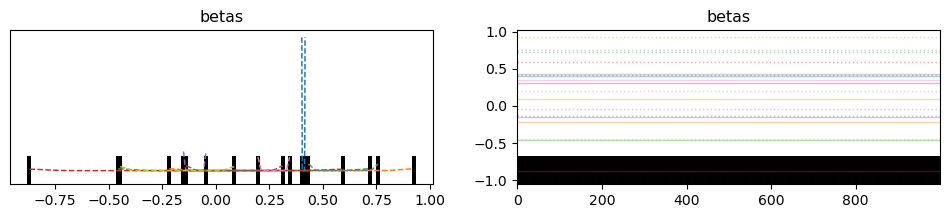

In [3]:
az.plot_trace(idata1, combined=True)

## Q2

In [4]:
data2 = pd.read_csv("data/fire.csv")
m2 = 4
n2, p2 = data2.shape[0], data2.shape[1] - m2
X2, Y2 = np.column_stack([np.ones(n2), data2.iloc[:, :p2].values]), data2.iloc[:, p2:].values

with pm.Model() as MVN1:
    packed_L = pm.LKJCholeskyCov("packed_L", n=m2, eta=2,
                                 sd_dist=pm.Exponential.dist(1, shape=m2), compute_corr=False)
    L = pm.expand_packed_triangular(m2, packed_L)
    betas = pm.Normal("betas", mu=0, sigma=1, shape=(p2+1, m2))
    y = pm.MvNormal("y", mu=X2@betas, chol=L, observed=Y2)
    idata2 = pm.sample(draws=d, chains=2, tune=100, random_seed=365)

az.summary(idata2, round_to=3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [packed_L, betas]


/opt/conda/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
Sampling 2 chains for 100 tune and 1_000 draw iterations (200 + 2_000 draws total) took 2188 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",5.772,1.025,3.949,7.675,0.019,0.022,2917.225,1526.869,1.000
"betas[0, 1]",-0.133,0.988,-1.926,1.652,0.018,0.024,2911.925,1379.936,1.001
"betas[0, 2]",0.443,1.013,-1.475,2.377,0.018,0.026,3204.041,1205.797,1.002
"betas[0, 3]",-2.588,0.926,-4.350,-0.991,0.017,0.025,3134.520,1611.770,1.002
"betas[1, 0]",2.387,0.063,2.267,2.503,0.004,0.002,315.771,1011.989,1.011
"betas[1, 1]",3.417,0.248,2.966,3.892,0.022,0.016,140.211,160.445,1.003
"betas[1, 2]",14.508,0.644,13.233,15.708,0.025,0.017,667.141,1060.706,1.004
"betas[1, 3]",0.403,0.032,0.343,0.462,0.001,0.001,2366.213,1498.027,1.001
"betas[2, 0]",0.590,0.025,0.543,0.637,0.001,0.001,1750.429,1162.491,1.002
"betas[2, 1]",1.055,0.099,0.869,1.242,0.006,0.003,318.451,505.383,1.001


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'packed_L'}>,
        <Axes: title={'center': 'packed_L'}>]], dtype=object)

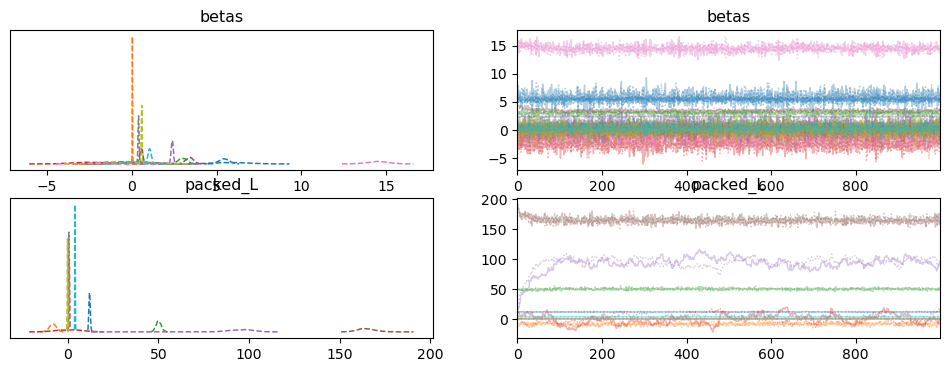

In [5]:
az.plot_trace(idata2, combined=True)

In [6]:
data3 = data2.iloc[:200, :]
m3 = 4
n3, p3 = data3.shape[0], data3.shape[1] - m3
X3, Y3 = np.column_stack([np.ones(n3), data3.iloc[:, :p3].values]), data3.iloc[:, p3:].values

with pm.Model() as MVN2:
    packed_L = pm.LKJCholeskyCov("packed_L", n=m3, eta=2,
                                 sd_dist=pm.Exponential.dist(1, shape=m3), compute_corr=False)
    L = pm.expand_packed_triangular(m3, packed_L)
    betas = pm.Normal("betas", mu=0, sigma=1, shape=(p3+1, m3))
    y = pm.MvNormal("y", mu=X3@betas, chol=L, observed=Y3)
    idata3 = pm.sample(draws=d, chains=2, tune=100, random_seed=365)

az.summary(idata3, round_to=3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [packed_L, betas]


/opt/conda/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
Sampling 2 chains for 100 tune and 1_000 draw iterations (200 + 2_000 draws total) took 1292 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",2.223,0.962,0.418,3.970,0.018,0.024,2912.069,1181.111,1.000
"betas[0, 1]",-0.023,0.998,-1.865,1.813,0.020,0.023,2520.848,1401.039,1.000
"betas[0, 2]",0.345,1.012,-1.508,2.210,0.019,0.022,2968.670,1393.858,1.001
"betas[0, 3]",-0.693,1.013,-2.644,1.115,0.019,0.025,2956.749,1362.557,1.000
"betas[1, 0]",2.934,0.109,2.739,3.134,0.009,0.002,145.453,739.555,1.025
"betas[1, 1]",2.539,0.274,2.049,3.047,0.017,0.013,278.505,288.569,1.005
"betas[1, 2]",10.381,0.828,8.858,11.921,0.026,0.021,1000.152,1162.030,1.003
"betas[1, 3]",0.322,0.062,0.204,0.441,0.001,0.001,1753.714,1317.030,1.001
"betas[2, 0]",0.656,0.038,0.587,0.729,0.001,0.001,658.496,1032.914,1.009
"betas[2, 1]",0.815,0.099,0.618,0.986,0.004,0.003,593.399,643.418,1.002


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'packed_L'}>,
        <Axes: title={'center': 'packed_L'}>]], dtype=object)

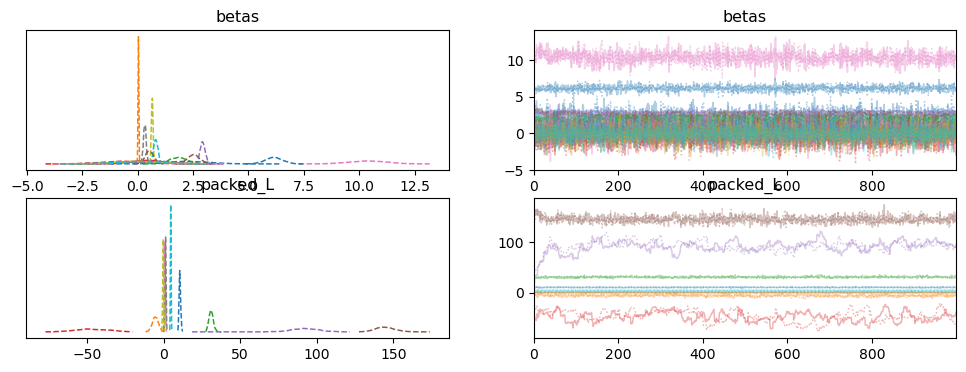

In [7]:
az.plot_trace(idata3, combined=True)

In [8]:
data4 = data2.iloc[:, 2:]
m4 = 4
n4, p4 = data4.shape[0], data4.shape[1] - m4
X4, Y4 = np.column_stack([np.ones(n4), data4.iloc[:, :p4].values]), data4.iloc[:, p4:].values

with pm.Model() as MVN3:
    packed_L = pm.LKJCholeskyCov("packed_L", n=m4, eta=2,
                                 sd_dist=pm.Exponential.dist(1, shape=m4), compute_corr=False)
    L = pm.expand_packed_triangular(m4, packed_L)
    betas = pm.Normal("betas", mu=0, sigma=1, shape=(p4+1, m4))
    y = pm.MvNormal("y", mu=X4@betas, chol=L, observed=Y4)
    idata4 = pm.sample(draws=d, chains=2, tune=100, random_seed=365)

az.summary(idata4, round_to=3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [packed_L, betas]


/opt/conda/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
Sampling 2 chains for 100 tune and 1_000 draw iterations (200 + 2_000 draws total) took 929 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",7.973,1.004,5.993,9.695,0.018,0.025,3238.869,1458.919,1.001
"betas[0, 1]",0.503,0.999,-1.340,2.408,0.020,0.024,2400.555,1451.894,1.004
"betas[0, 2]",0.934,1.002,-0.837,2.808,0.019,0.023,2879.760,1532.180,0.999
"betas[0, 3]",-2.216,0.934,-3.881,-0.347,0.018,0.025,2573.945,1073.410,1.001
"betas[1, 0]",8.793,0.363,8.081,9.457,0.015,0.011,596.892,679.865,1.000
"betas[1, 1]",2.722,0.638,1.554,3.948,0.018,0.017,1253.540,1006.349,1.001
"betas[1, 2]",4.960,0.965,3.222,6.900,0.027,0.034,1418.013,699.531,1.000
"betas[1, 3]",1.192,0.128,0.935,1.413,0.003,0.003,2069.683,1553.611,1.000
"betas[2, 0]",-0.290,0.910,-2.067,1.324,0.016,0.020,3123.155,1483.206,1.001
"betas[2, 1]",0.253,1.069,-1.857,2.090,0.018,0.033,3360.500,1019.736,1.005


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'packed_L'}>,
        <Axes: title={'center': 'packed_L'}>]], dtype=object)

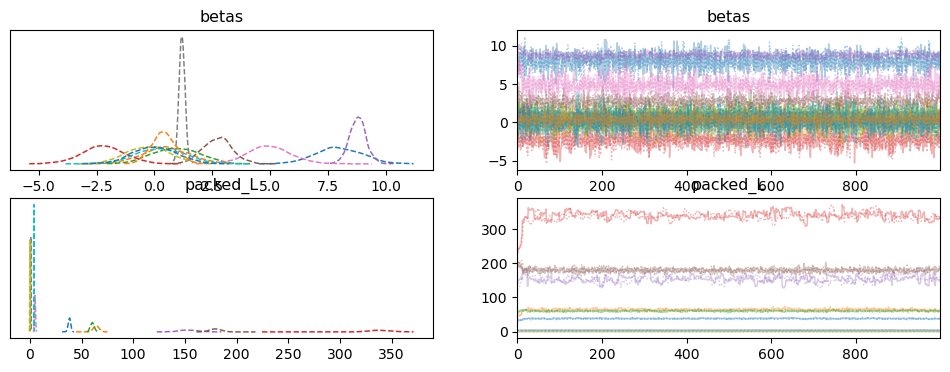

In [9]:
az.plot_trace(idata4, combined=True)

In [10]:
data5 = data2.iloc[:, :6]
m5 = 2
n5, p5 = data5.shape[0], data5.shape[1] - m5
X5, Y5 = np.column_stack([np.ones(n5), data5.iloc[:, :p5].values]), data5.iloc[:, p5:].values

with pm.Model() as MVN4:
    packed_L = pm.LKJCholeskyCov("packed_L", n=m5, eta=2,
                                 sd_dist=pm.Exponential.dist(1, shape=m5), compute_corr=False)
    L = pm.expand_packed_triangular(m5, packed_L)
    betas = pm.Normal("betas", mu=0, sigma=1, shape=(p5+1, m5))
    y = pm.MvNormal("y", mu=X5@betas, chol=L, observed=Y5)
    idata5 = pm.sample(draws=d, chains=2, tune=100, random_seed=365)

az.summary(idata5, round_to=3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [packed_L, betas]


/opt/conda/lib/python3.11/site-packages/pytensor/compile/function/types.py:970: RuntimeWarning: invalid value encountered in accumulate
  self.vm()
Sampling 2 chains for 100 tune and 1_000 draw iterations (200 + 2_000 draws total) took 514 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",5.577,1.030,3.655,7.496,0.027,0.024,1478.845,1187.200,1.002
"betas[0, 1]",-0.146,0.983,-2.059,1.687,0.025,0.020,1571.971,1548.190,1.001
"betas[1, 0]",2.398,0.057,2.288,2.501,0.001,0.001,1854.269,1237.101,1.000
"betas[1, 1]",4.433,0.222,4.034,4.854,0.005,0.005,2170.090,1416.770,1.001
"betas[2, 0]",0.592,0.025,0.551,0.645,0.001,0.001,2171.430,1715.219,1.000
"betas[2, 1]",0.775,0.098,0.598,0.954,0.002,0.002,1862.542,1541.561,1.001
"betas[3, 0]",2.979,0.261,2.463,3.438,0.005,0.006,2285.860,1289.554,1.000
"betas[3, 1]",-1.249,0.756,-2.646,0.189,0.016,0.020,2330.749,1477.981,1.002
"betas[4, 0]",-1.439,0.847,-3.025,0.074,0.020,0.018,1880.309,1581.273,1.001
"betas[4, 1]",0.060,0.965,-1.696,1.917,0.026,0.020,1360.673,1462.526,1.002


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>],
       [<Axes: title={'center': 'packed_L'}>,
        <Axes: title={'center': 'packed_L'}>]], dtype=object)

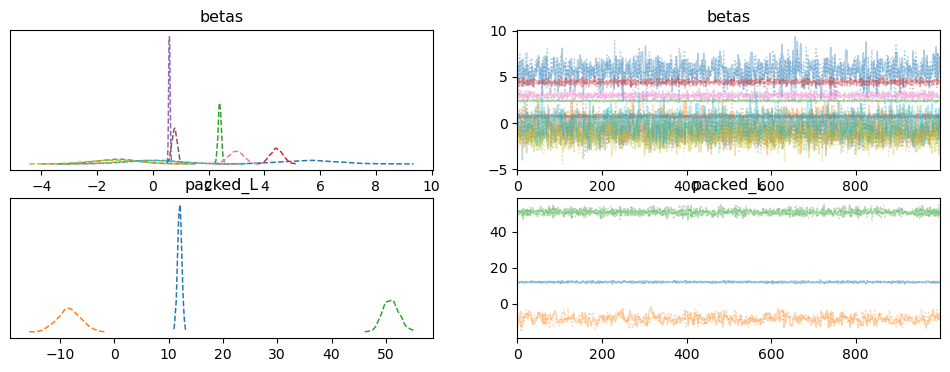

In [11]:
az.plot_trace(idata5, combined=True)

Inceasing `n` would increase the precision of the model; increasing `p` would also increase the precision of the model, but might introduce overfitting; increasing `m` would increase the complexity of the model.

## Q3

In [12]:
data6 = pd.read_csv("data/flower.csv")
m6 = 2
n6, p6 = data6.shape[0], data6.shape[1] - m6
X6, Y6 = np.column_stack([np.ones(n6), data6.iloc[:, :p6].values]), data6.iloc[:, p6:].values

with pm.Model() as MVN5:
    betas = pm.Normal("betas", mu=0, sigma=1, shape=(p6+1, m6))
    y = pm.Bernoulli("y", p=pm.math.invprobit(X6@betas), observed=Y6)
    idata6 = pm.sample(draws=d, chains=2, tune=100, random_seed=365)

az.summary(idata6, round_to=3)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [betas]


Sampling 2 chains for 100 tune and 1_000 draw iterations (200 + 2_000 draws total) took 18 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"betas[0, 0]",0.240,0.951,-1.411,2.122,0.030,0.025,1007.977,1138.527,1.004
"betas[0, 1]",1.456,0.794,0.032,2.947,0.023,0.016,1232.842,1261.215,1.003
"betas[1, 0]",0.322,0.562,-0.755,1.313,0.019,0.015,854.990,874.291,1.003
"betas[1, 1]",0.209,0.292,-0.317,0.769,0.007,0.006,1941.998,1518.033,1.004
"betas[2, 0]",1.207,0.717,-0.145,2.485,0.026,0.017,768.754,924.981,1.003
"betas[2, 1]",-1.221,0.340,-1.837,-0.592,0.007,0.007,2214.132,1355.679,1.004
"betas[3, 0]",-1.851,0.614,-3.002,-0.696,0.019,0.015,1029.673,998.278,1.000
"betas[3, 1]",0.513,0.291,-0.063,1.036,0.007,0.006,1711.026,1320.080,1.001
"betas[4, 0]",-0.861,0.953,-2.635,0.855,0.031,0.023,955.785,1062.688,1.002
"betas[4, 1]",-1.211,0.495,-2.081,-0.235,0.012,0.013,1758.904,1381.180,1.003


array([[<Axes: title={'center': 'betas'}>,
        <Axes: title={'center': 'betas'}>]], dtype=object)

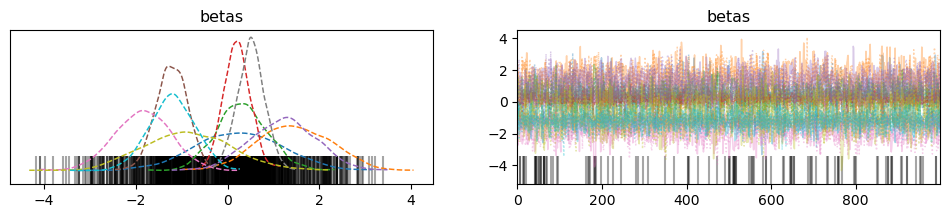

In [13]:
az.plot_trace(idata6, combined=True)